In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/data.csv')
df.head()

,Party,Party Abbreviation,Won,Leading,Total
0,Bharatiya Janata Party - BJP,BJP,240,0,240
1,Indian National Congress - INC,INC,99,0,99
2,Samajwadi Party - SP,SP,37,0,37
3,All India Trinamool Congress - AITC,AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,DMK,22,0,22


C:\Users\annar\AppData\Local\Temp\ipykernel_25284\2359816684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Total', y='Party Abbreviation', palette='viridis')


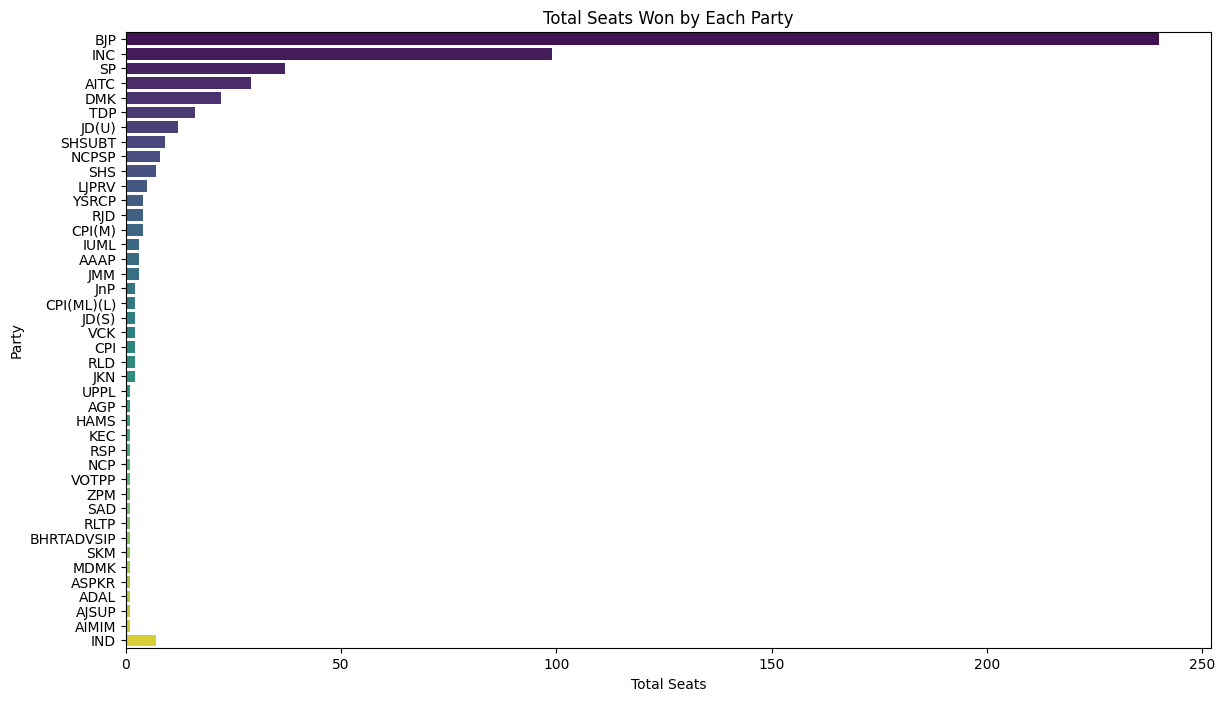

In [4]:
# Plot total seats won by each party
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Total', y='Party Abbreviation', palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

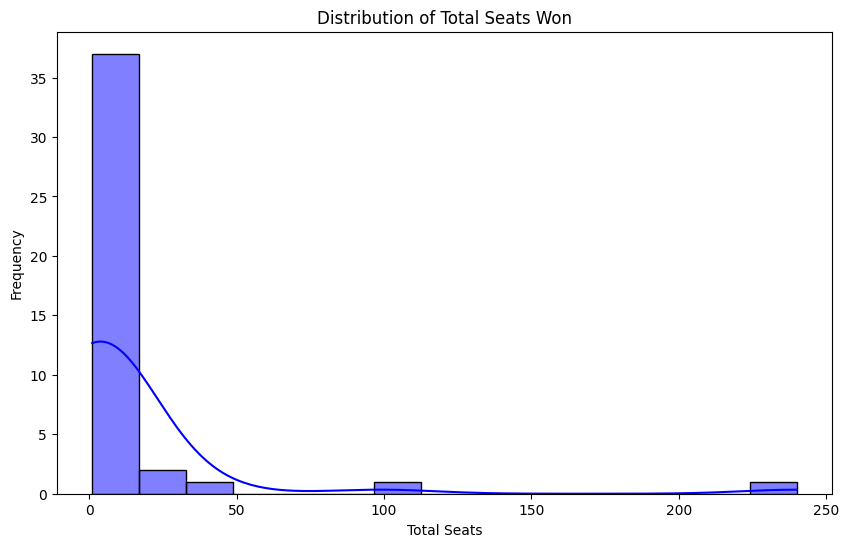

In [5]:
# Plot distribution of total seats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=15, kde=True, color='blue')
plt.title('Distribution of Total Seats Won')
plt.xlabel('Total Seats')
plt.ylabel('Frequency')
plt.show()

C:\Users\annar\AppData\Local\Temp\ipykernel_25284\817601516.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_parties, x='Total', y='Party Abbreviation', palette='muted')


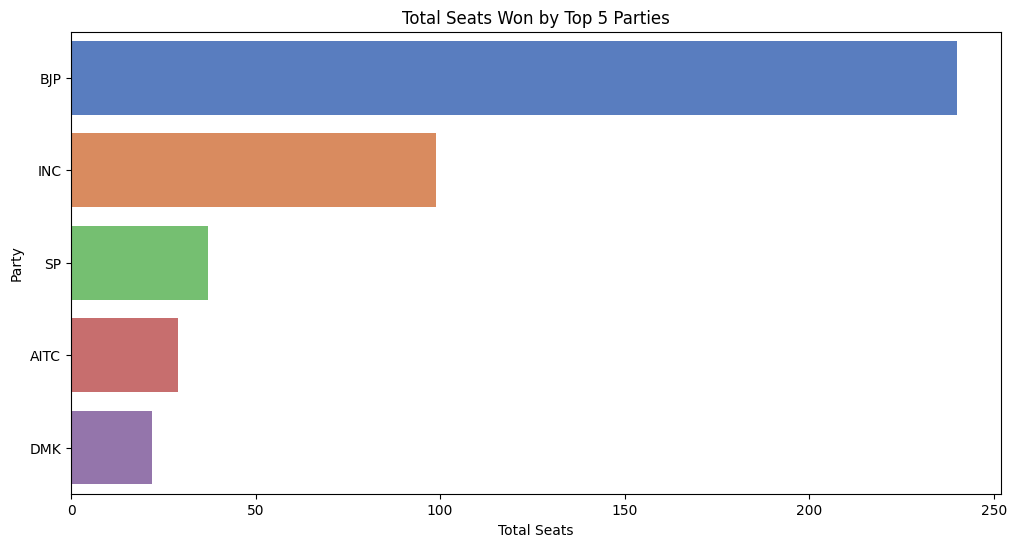

In [6]:
# Get top 5 parties by total seats
top_5_parties = df.nlargest(5, 'Total')

# Plot total seats of top 5 parties
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_parties, x='Total', y='Party Abbreviation', palette='muted')
plt.title('Total Seats Won by Top 5 Parties')
plt.xlabel('Total Seats')
plt.ylabel('Party')
plt.show()

In [7]:
# Summary statistics
summary = df.describe()

# Top 5 parties
top_5_summary = top_5_parties[['Party', 'Party Abbreviation', 'Total']]

print("Summary Statistics:")
print(summary)

print("\nTop 5 Parties by Total Seats:")
print(top_5_summary)

# Save summary and top 5 parties to CSV files
summary.to_csv('./data/summary_statistics.csv')
top_5_summary.to_csv('./data/top_5_parties.csv')

print("Summary statistics and top 5 parties have been saved to CSV files.")

Summary Statistics:
              Won  Leading       Total
count   42.000000     42.0   42.000000
mean    12.928571      0.0   12.928571
std     39.466808      0.0   39.466808
min      1.000000      0.0    1.000000
25%      1.000000      0.0    1.000000
50%      2.000000      0.0    2.000000
75%      6.500000      0.0    6.500000
max    240.000000      0.0  240.000000

Top 5 Parties by Total Seats:
                                 Party Party Abbreviation  Total
0         Bharatiya Janata Party - BJP                BJP    240
1       Indian National Congress - INC                INC     99
2                 Samajwadi Party - SP                 SP     37
3  All India Trinamool Congress - AITC               AITC     29
4      Dravida Munnetra Kazhagam - DMK                DMK     22
Summary statistics and top 5 parties have been saved to CSV files.


In [5]:
df = pd.read_csv('data/all.csv')
df.head()

,S.N.,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,1,BISHNU PADA RAY,Bharatiya Janata Party,102182,254,102436,50.58
1,2,KULDEEP RAI SHARMA,Indian National Congress,77829,211,78040,38.54
2,3,MANOJ PAUL,Andaman Nicobar Democratic Congress,8236,18,8254,4.08
3,4,D AYYAPPAN,Communist Party of India (Marxist),6009,8,6017,2.97
4,5,V.K. ABDUL AZIZ,Independent,2195,8,2203,1.09


In [21]:
df.columns

Index(['S.N.', 'Candidate', 'Party', 'EVM Votes', 'Postal Votes',
       'Total Votes', '% of Votes'],
      dtype='object')

In [27]:
df['Total Votes'] = pd.to_numeric(df['Total Votes'], errors='coerce')
df['Postal Votes'] = pd.to_numeric(df['Postal Votes'], errors='coerce')
df['EVM Votes'] = pd.to_numeric(df['EVM Votes'], errors='coerce')
df['% of Votes'] = pd.to_numeric(df['% of Votes'], errors='coerce')

In [12]:
# 1. Top Candidates by Total Votes
top_candidates = df.nlargest(10, 'Total Votes')
print("Top 10 Candidates by Total Votes:")
print(top_candidates[['Candidate', 'Party', 'Total Votes']])

Top 10 Candidates by Total Votes:
                  Candidate                         Party  Total Votes
549         RAKIBUL HUSSAIN      Indian National Congress    1471885.0
3340        SHANKAR LALWANI        Bharatiya Janata Party    1226751.0
3573  SHIVRAJ SINGH CHOUHAN        Bharatiya Janata Party    1116460.0
2534       DR C N MANJUNATH        Bharatiya Janata Party    1079002.0
1422      BRIJMOHAN AGRAWAL        Bharatiya Janata Party    1050351.0
8695      ABHISHEK BANERJEE  All India Trinamool Congress    1048230.0
1715              C R PATIL        Bharatiya Janata Party    1031065.0
1641              AMIT SHAH        Bharatiya Janata Party    1010972.0
7179        EATALA RAJENDER        Bharatiya Janata Party     991042.0
2512      SHOBHA KARANDLAJE        Bharatiya Janata Party     986049.0


In [13]:

# 2. Vote Share by Party
party_vote_share = df.groupby('Party')['Total Votes'].sum().reset_index()
party_vote_share['% of Total Votes'] = (party_vote_share['Total Votes'] / party_vote_share['Total Votes'].sum()) * 100
print("Vote Share by Party:")
print(party_vote_share)

Vote Share by Party:
                                     Party  Total Votes  % of Total Votes
0                  AARAKSHAN VIRODHI PARTY       1444.0          0.000222
1                               AJSU Party     458677.0          0.070555
2                    Aadarsh Mithila Party      29550.0          0.004545
3                    Aadarsh Sangram Party        865.0          0.000133
4                        Aadi Bharat Party        742.0          0.000114
..                                     ...          ...               ...
742                  Yuva Krantikari Party       8736.0          0.001344
743                       Yuva Taram Party       1369.0          0.000211
744                       Yuva Vikas Party       1679.0          0.000258
745  Yuvajana Sramika Rythu Congress Party   13316039.0          2.048319
746                Zoram People’s Movement     208552.0          0.032080

[747 rows x 3 columns]


In [14]:
# 3. Candidates with Highest Postal Votes
top_postal_votes = df.nlargest(10, 'Postal Votes')
print("Top 10 Candidates by Postal Votes:")
print(top_postal_votes[['Candidate', 'Party', 'Postal Votes']])

Top 10 Candidates by Postal Votes:
                        Candidate                                Party  \
400      KINJARAPU RAMMOHAN NAIDU                         Telugu Desam   
327     PRABHAKAR REDDY VEMIREDDY                         Telugu Desam   
2060          ANURAG SINGH THAKUR               Bharatiya Janata Party   
5759                  ANIL CHOPRA             Indian National Congress   
145   DR CHANDRA SEKHAR PEMMASANI                         Telugu Desam   
490         APPALANAIDU KALISETTI                         Telugu Desam   
5890                      AMRARAM  Communist Party of India  (Marxist)   
8431                  ANIL BALUNI               Bharatiya Janata Party   
456         SRIBHARAT MATHUKUMILI                         Telugu Desam   
7482             BIPLAB KUMAR DEB               Bharatiya Janata Party   

      Postal Votes  
400        19827.0  
327        15431.0  
2060       14013.0  
5759       13969.0  
145        13928.0  
490        13829.0  
589

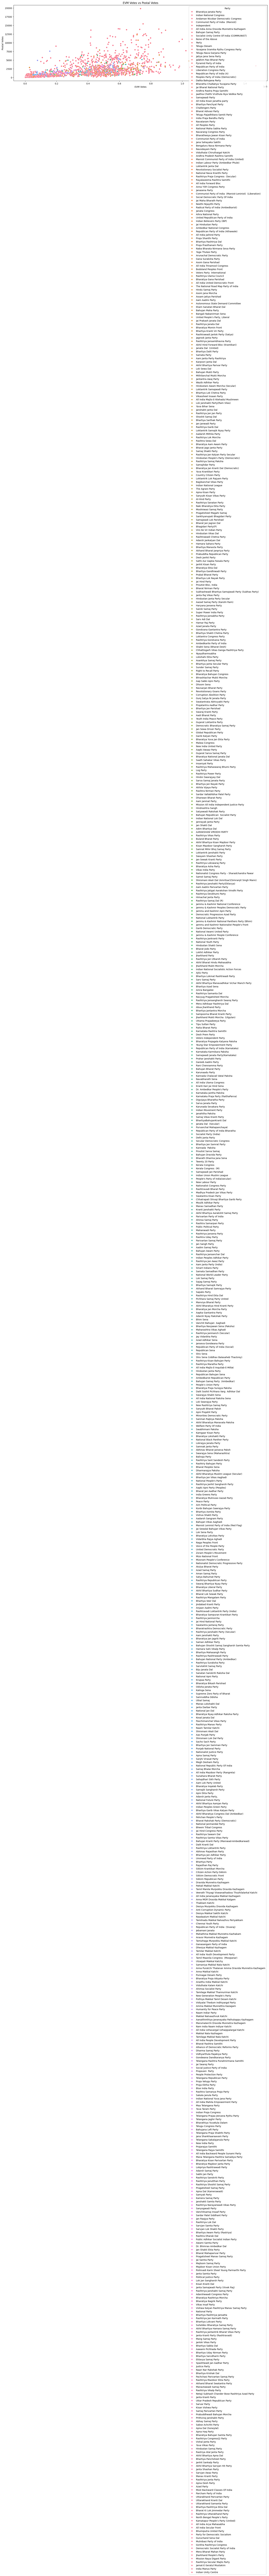

In [26]:
# 4. EVM vs Postal Votes
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='EVM Votes', y='Postal Votes', hue='Party')
plt.title('EVM Votes vs Postal Votes')
plt.xlabel('EVM Votes')
plt.ylabel('Postal Votes')
plt.show()

In [28]:
# 5. Candidates with More Postal Votes than EVM Votes
more_postal_than_evm = df[df['Postal Votes'] > df['EVM Votes']]
print("Candidates with More Postal Votes than EVM Votes:")
print(more_postal_than_evm[['Candidate', 'Party', 'EVM Votes', 'Postal Votes']])

Candidates with More Postal Votes than EVM Votes:
Empty DataFrame
Columns: [Candidate, Party, EVM Votes, Postal Votes]
Index: []


In [29]:
# 6. Party-wise Total Votes
party_total_votes = df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).reset_index()
print("Party-wise Total Votes:")
print(party_total_votes)

# 7. Average Percentage of Votes
average_percentage_votes = df['% of Votes'].mean()
print(f"Average Percentage of Votes: {average_percentage_votes:.2f}%")

Party-wise Total Votes:
                                         Party  Total Votes
0                       Bharatiya Janata Party  238453662.0
1                     Indian National Congress  138241353.0
2                              Samajwadi Party   29549381.0
3                 All India Trinamool Congress   28213393.0
4                                  Independent   17915654.0
..                                         ...          ...
742  Rashtriya Jatigat Aarakshan Virodhi Party        215.0
743     All India Backward People Sunami Party        210.0
744       Telangana Prajaa Jeevana Rythu Party        141.0
745                      Indian Praja Congress        141.0
746                                      Party          0.0

[747 rows x 2 columns]
Average Percentage of Votes: 6.08%


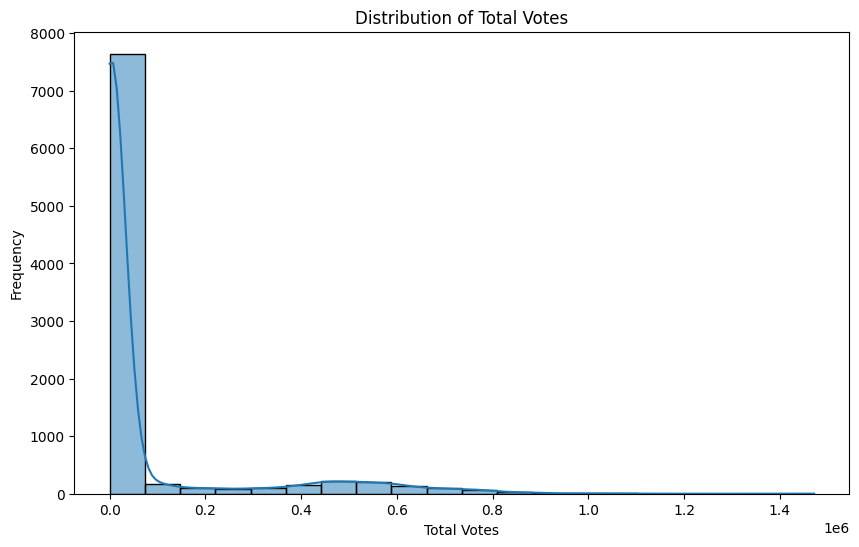

In [30]:
# 8. Vote Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Votes'], bins=20, kde=True)
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.show()

In [32]:
# 9. Outliers in Votes
q1 = df['Total Votes'].quantile(0.25)
q3 = df['Total Votes'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['Total Votes'] < (q1 - 1.5 * iqr)) | (df['Total Votes'] > (q3 + 1.5 * iqr))]
print("Outliers in Total Votes:")
print(outliers[['Candidate', 'Party', 'Total Votes']])

Outliers in Total Votes:
                   Candidate                                Party  Total Votes
0            BISHNU PADA RAY               Bharatiya Janata Party     102436.0
1         KULDEEP RAI SHARMA             Indian National Congress      78040.0
14           BISHNU PADA RAY               Bharatiya Janata Party     102436.0
15        KULDEEP RAI SHARMA             Indian National Congress      78040.0
27     G M HARISH (BALAYOGI)                         Telugu Desam     796981.0
...                      ...                                  ...          ...
9011          SAYAN BANERJEE  Communist Party of India  (Marxist)      85389.0
9019             SAJDA AHMED         All India Trinamool Congress     724622.0
9020  ARUNUDAY PAULCHOWDHURY               Bharatiya Janata Party     505949.0
9021          AZAHAR MOLLICK             Indian National Congress      78589.0
9022           MOFIKUL ISLAM              All India Secular Front      38991.0

[1635 rows x 3 columns]
